![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 5. Multinomial Logistic Regression

Multinomial Logistic Regression is an essential statistical technique for predicting categorical outcomes where the response variable has more than two classes. It’s widely used in various fields, such as healthcare, marketing, and social sciences, to model and interpret multi-class problems such as customer preferences, diagnosis predictions, and product category classification. This tutorial will guide you through the essentials of multinomial logistic regression, from building a model from scratch in R to leveraging the {nnet} package for a more efficient approach.


## Overview

Multinomial logistic regression is a statistical technique used to model the relationship between multiple independent variables and a categorical dependent variable with more than two possible outcome categories or nominal outcome variables. It is an extension of binary logistic regression, which deals with just two categories.

In multinomial logistic regression, the dependent variable can have three or more categories, and the model estimates the probability of each category given a set of predictors. The model calculates separate equations for each category relative to a reference category. These equations are typically based on the log-odds of the probability of belonging to each category. The multinomial logistic regression model assumes that the relationship between the independent variables and the dependent variable is linear in the logit (log-odds) space. The coefficients estimated by the model represent the effect of each independent variable on the log-odds of being in each category relative to the reference category.

For example:

- Predicting which political party a person will vote for: *Democrat, Republican, Green, Libertarian*
- Classifying types of diseases: *Type A, Type B, Type C*
- Modeling product choice: *Product A, B, or C*

Interpretation of the coefficients in multinomial logistic regression can be challenging because they represent the change in log-odds relative to the reference category. Therefore, converting these coefficients into odds ratios or probabilities can help in understanding the effects of the independent variables on the outcome categories.





### Key Features

| Feature | Description |
|--------|-------------|
| **Multi-class Output** | Handles 3 or more nominal (unordered) outcome categories. |
| **Probabilistic Output** | Returns predicted probabilities for each class. |
| **No Distribution Assumptions** | Does not assume normality of predictors. |
| **Linear in Log-Odds** | Models the log-odds (logits) of class membership as a linear function of predictors. |
| **Reference Category** | One class is chosen as the baseline (reference), and all comparisons are made relative to it. |
| **Coefficients per Class** | Each non-reference class has its own set of coefficients. |
| **Softmax Function** | Uses the softmax function to convert linear outputs into probabilities. |

### How it works

Multinomial Logistic Regression (MLR) is an extension of binary logistic regression used when the dependent variable $y$ is categorical with more than two levels (e.g., $C$ classes, $y \in \{1, 2, \dots, C\}$.

Input and output variables are defined as:

-   **Input Variables:** $\mathbf{x} = [x_1, x_2, \dots, x_p]^T$ (a vector of \$p \$ -features).
-   **Output Variable:** $y \in \{1, 2, \dots, C\}$.

Model the probability of $y$ belonging to each class $c$:

$$ P(y = c \mid \mathbf{x}) $$

such that $\sum_{c=1}^C P(y = c \mid \mathbf{x}) = 1$.

In Multinomial Logistic Model, for each class $c$, define the linear predictor $\eta_c$ as:

$$ \eta_c = \mathbf{\beta}_c^T \mathbf{x} + \beta_{c, 0} $$

where:

-   $\mathbf{\beta}_c$ is the coefficient vector for class $c$.

-   $\beta_{c, 0}$ is the intercept term for class $c$.

The probabilities are modeled using the **softmax function**:

$$ P(y = c \mid \mathbf{x}) = \frac{\exp(\eta_c)}{\sum_{j=1}^C \exp(\eta_j)} $$

Given a dataset of $N$ observations $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$, the likelihood is: $$ \mathcal{L}(\beta) = \prod_{i=1}^N \prod_{c=1}^C \big[P(y_i = c \mid \mathbf{x}_i)\big]^{\mathbb{1}(y_i = c)} $$

Taking the log, we get the **log-likelihood**:

$$ \ell(\beta) = \sum_{i=1}^N \sum_{c=1}^C \mathbb{1}(y_i = c) \log\big(P(y = c \mid \mathbf{x}_i)\big) $$

Parameters $\{\mathbf{\beta}_c, \beta_{c,0}\}_{c=1}^{C-1}$ are estimated by maximizing the log-likelihood using optimization techniques like gradient descent or Newton-Raphson.

To avoid overparameterization, one class (e.g., the last class) is typically set as the **reference class**, and its coefficients are set to zero ($\beta_C = 0$).


###  Applications

Multinomial Logistic Regression is widely used across disciplines:

| Field | Application Example |
|------|---------------------|
| **Healthcare** | Diagnosing disease types (e.g., Type 1, 2, or 3 diabetes) based on symptoms and biomarkers |
| **Marketing** | Predicting customer choice among multiple products or brands |
| **Education** | Modeling student choice of major: STEM, Humanities, Business, etc. |
| **Politics** | Forecasting voter preference among multiple candidates or parties |
| **Finance** | Credit rating classification: Low, Medium, High risk |
| **Natural Language Processing** | Text classification (e.g., topic modeling: sports, politics, tech) |


### Advantages

- Interpretable coefficients and probabilities
- No strong assumptions about data distribution
- Handles both continuous and categorical predictors
- Well-suited for small-to-medium datasets


### Disadvantages

- Assumes IIA (can be restrictive)
- Not ideal for high-dimensional data (use SVM or Random Forest instead)
- Requires careful handling of categorical variables and reference class

## Miltinomial Logistic Regression from Scartch


To create a multinomial logistic regression from scratch in Python, we’ll build a model that handles a response variable with three levels (e.g., categories A, B, and C), using four continuous predictors and one categorical predictor with two levels (Male and Female). Here’s a step-by-step approach:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-whitegrid')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Simulate data

In [2]:
np.random.seed(123)

n = 300
data = pd.DataFrame({
    'response': np.random.choice(['1', '2', '3'], size=n),
    'continuous1': np.random.randn(n),
    'continuous2': np.random.randn(n),
    'continuous3': np.random.randn(n),
    'continuous4': np.random.randn(n),
    'gender': np.random.choice(['Male', 'Female'], size=n)
})

data['response'] = pd.Categorical(data['response'], categories=['1', '2', '3'])
data['gender'] = pd.Categorical(data['gender'])

print(data.head())

  response  continuous1  continuous2  continuous3  continuous4  gender
0        3     0.831080     0.063934     0.451973     0.818223  Female
1        2     0.022368    -1.779084     0.997351     0.295653  Female
2        3    -0.069009    -0.268689    -1.885260     1.049891    Male
3        3    -1.933373     0.809451    -1.950770     0.765028  Female
4        1    -0.592466     0.245856    -0.392490     0.982888    Male


### Data Preparation

In [3]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode response and gender
ohe_response = OneHotEncoder(sparse_output=False, dtype=np.float64)
ohe_gender = OneHotEncoder(sparse_output=False, dtype=np.float64)

response_matrix = ohe_response.fit_transform(data[['response']])  # n x 3
gender_matrix = ohe_gender.fit_transform(data[['gender']])        # n x 2

print(f"response_matrix shape: {response_matrix.shape}")
print(f"gender_matrix shape: {gender_matrix.shape}")

response_matrix shape: (300, 3)
gender_matrix shape: (300, 2)


### Combined Predictors

In [5]:
# Design matrix X (with intercept)
X = np.column_stack([
    np.ones(n),  # intercept
    data['continuous1'],
    data['continuous2'],
    data['continuous3'],
    data['continuous4'],
    gender_matrix[:, 1]  # use 'Male' as baseline (Female = 1)
])

print(f"X shape: {X.shape}")

X shape: (300, 6)


### Define Log-Likelihood Function

The log-likelihood function is a fundamental concept in statistics, particularly in maximum likelihood estimation (MLE). It measures how well a statistical model explains a set of observations, and it's central to estimating the parameters of a model that are most likely to have produced the observed data.

In [6]:
def log_likelihood(params, response_matrix, X):
    n_classes = response_matrix.shape[1]
    n_features = X.shape[1]
    
    # Reshape parameters: (n_features x (n_classes - 1))
    beta = params.reshape((n_features, n_classes - 1))
    
    # Linear predictors for non-reference classes (2 and 3)
    eta = X @ beta  # n x (C-1)
    
    # Softmax probabilities
    exp_eta = np.exp(eta)
    # Add reference class (class 1) as 1
    probs_non_ref = exp_eta
    probs_ref = np.ones((eta.shape[0], 1))
    total = np.hstack([probs_ref, probs_non_ref]).sum(axis=1, keepdims=True)
    
    # Full probability matrix
    p = np.hstack([probs_ref, probs_non_ref]) / total
    
    # Avoid log(0)
    p = np.clip(p, 1e-15, 1 - 1e-15)
    
    # Negative log-likelihood
    ll = -np.sum(response_matrix * np.log(p))
    return ll

### Optimization for MLE



In [7]:
# Initial parameters
n_params = X.shape[1] * (response_matrix.shape[1] - 1)
initial_params = np.zeros(n_params)

result = minimize(
    log_likelihood,
    initial_params,
    args=(response_matrix, X),
    method='BFGS',
    jac=None,
    hess=None
)

if result.success:
    print("Optimization successful.")
else:
    print("Optimization failed.")

Optimization successful.


###  Summary  of the Model

In [8]:
# Reshape coefficients
beta_est = result.x.reshape((X.shape[1], 2))
coefficients = pd.DataFrame(
    beta_est,
    columns=['Level2', 'Level3'],
    index=['Intercept', 'continuous1', 'continuous2', 'continuous3', 'continuous4', 'Gender_Male']
)

# Standard errors from inverse Hessian
if hasattr(result, 'hess_inv'):
    hess_inv = result.hess_inv
    if isinstance(hess_inv, np.ndarray):
        se_flat = np.sqrt(np.diag(hess_inv))
    else:
        se_flat = np.sqrt(np.diag(hess_inv.todense()))
    se = se_flat.reshape(beta_est.shape)
else:
    se = np.nan

z_stats = beta_est / se

# Create summary table
summary_table = pd.DataFrame()
for i, col in enumerate(coefficients.columns):
    temp = pd.DataFrame({
        'Predictor': coefficients.index,
        'Level': col,
        'Coefficient': beta_est[:, i],
        'Std_Error': se[:, i] if not np.isscalar(se) else np.nan,
        'Z_Statistic': z_stats[:, i] if not np.isscalar(z_stats) else np.nan
    })
    summary_table = pd.concat([summary_table, temp], ignore_index=True)

print(summary_table)

      Predictor   Level  Coefficient  Std_Error  Z_Statistic
0     Intercept  Level2    -0.198795   0.215107    -0.924166
1   continuous1  Level2     0.022764   0.136661     0.166572
2   continuous2  Level2     0.122306   0.139823     0.874717
3   continuous3  Level2    -0.120855   0.137962    -0.876006
4   continuous4  Level2    -0.112198   0.152202    -0.737168
5   Gender_Male  Level2     0.542706   0.292444     1.855758
6     Intercept  Level3    -0.086205   0.209740    -0.411011
7   continuous1  Level3     0.022345   0.135104     0.165387
8   continuous2  Level3     0.105945   0.139386     0.760082
9   continuous3  Level3     0.159991   0.138321     1.156659
10  continuous4  Level3    -0.197276   0.152274    -1.295530
11  Gender_Male  Level3     0.338033   0.292174     1.156958


### Relative Risk Ratios (RRRs)

In the context of multinomial logistic regression, the concept of relative risk ratios (RRRs) can be interpreted similarly to odds ratios in binary logistic regression. RRRs quantify the relative change in the odds of being in one category compared to a reference category, for a one-unit change in the predictor variable.

To obtain the relative risk ratios, you exponentiate the coefficients:

$$ \text{RRR}{j, k} = e^{\beta{jk}} $$

Where: - $\text{RRR}{j, k}$ is the relative risk ratio for predictor $j$ and category $k$,

-   $\beta{jk}$ is the coefficient for predictor $j$ and category $k$ ).

These relative risk ratios quantify how much the odds of being in category $k$ change for a one-unit increase in the predictor variable $X_j$, relative to the reference category. You can interpret a relative risk ratio of 1 as indicating no change in the odds of being in category $k$ for a one-unit change in the predictor variable. A relative risk ratio greater than 1 indicates an increase in the odds, while a ratio less than 1 indicates a decrease in the odds.

We can extract the coefficients from the model object and exponentiate them to obtain the relative risk ratios. This will give you the relative risk ratios for each predictor variable and each category of the dependent variable in the multinomial logistic regression model.

In [9]:
rrr = np.exp(beta_est)
risk_table = pd.DataFrame()
for i, col in enumerate(['Level2', 'Level3']):
    temp = pd.DataFrame({
        'Predictor': coefficients.index,
        'Level': col,
        'RRR': rrr[:, i]
    })
    risk_table = pd.concat([risk_table, temp], ignore_index=True)

print(risk_table)

      Predictor   Level       RRR
0     Intercept  Level2  0.819718
1   continuous1  Level2  1.023025
2   continuous2  Level2  1.130100
3   continuous3  Level2  0.886162
4   continuous4  Level2  0.893867
5   Gender_Male  Level2  1.720657
6     Intercept  Level3  0.917406
7   continuous1  Level3  1.022596
8   continuous2  Level3  1.111761
9   continuous3  Level3  1.173500
10  continuous4  Level3  0.820964
11  Gender_Male  Level3  1.402187


### Prediction and Evaluation

In [10]:
def predict_probs(X, beta_matrix):
    eta = X @ beta_matrix
    exp_eta = np.exp(eta)
    total = np.hstack([np.ones((eta.shape[0], 1)), exp_eta]).sum(axis=1, keepdims=True)
    p = np.hstack([np.ones((eta.shape[0], 1)), exp_eta]) / total
    return p

probs = predict_probs(X, beta_est)
predicted_classes = np.argmax(probs, axis=1) + 1  # 1,2,3
true_classes = data['response'].astype(int)

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.3f}")

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.383
Confusion Matrix:
[[25 35 33]
 [24 42 37]
 [16 40 48]]



## Multinominal Logistic Regression in with Python

Multinomial Logistic Regression in Python can be implemented using the `LogisticRegression` class from the `sklearn` library. This class allows us to fit a logistic regression model when the outcome variable has more than two categories.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from statsmodels.discrete.discrete_model import MNLogit  # Corrected import
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels

# Check statsmodels version to ensure compatibility
print("statsmodels version:", statsmodels.__version__)

statsmodels version: 0.14.5


### Data

In this tutorial, we will be using [health_insurance data](http://peopleanalytics-regression-book.org/data/health_insurance.csv).

The health_insurance data set consists of the following fields:

* `product`: The choice of product of the individual—A, B or C
* `age`: The age of the individual when they made the choice
* `gender`: The gender of the individual as stated when they made the choice
* `household`: The number of people living with the individual in the same household at the time of the choice
* `position_level`: Position level in the company at the time they made the choice, where 1 is is the lowest and 5 is the highest
* `absent`: The number of days the individual was absent from work in the year prior to the choice

Full data set is available for download can download from my [Dropbox](https://www.dropbox.com/scl/fo/2rh6r68i9cxmgortvbw8q/h?rlkey=bvntt66n9mcywprmdki08ch3r&dl=0) or from my [Github](https://github.com/zia207/r-colab/tree/main/Data/Regression_analysis) accounts.



In [14]:
# Load data from URL
url = "https://github.com/zia207/r-colab/raw/main/Data/Regression_analysis/health_insurance.csv"
mf = pd.read_csv(url)

# Display a glimpse of the data
print(mf.head())
print(mf.info())

  product  age  household  position_level  gender  absent
0       C   57          2               2    Male      10
1       A   21          7               2    Male       7
2       C   66          7               2    Male       1
3       A   36          4               2  Female       6
4       A   23          0               2    Male      11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product         1448 non-null   object
 1   age             1448 non-null   int64 
 2   household       1448 non-null   int64 
 3   position_level  1448 non-null   int64 
 4   gender          1448 non-null   object
 5   absent          1448 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 68.0+ KB
None


#### Convert to Factor



In [15]:
# Convert 'product' and 'gender' columns to categorical
mf['product'] = mf['product'].astype('category')
mf['gender'] = mf['gender'].astype('category')

# Display levels of 'gender'
print(mf['gender'].cat.categories)

Index(['Female', 'Male'], dtype='object')


#### Summary Statistics


In [16]:
# Select variables and compute summary statistics
selected_cols = ['age', 'household', 'position_level', 'absent']
summary_stats = mf[selected_cols].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print(summary_stats)

                     mean        std   min   25%   50%   75%   max
age             40.941989  13.538374  21.0  30.0  37.0  53.0  67.0
household        3.256215   2.232193   0.0   2.0   3.0   5.0   7.0
position_level   2.903315   1.216809   1.0   2.0   3.0   4.0   5.0
absent          14.492403   8.113054   0.0   8.0  15.0  21.0  31.0


#### Box/Violine Plots




Tukey's HSD for age by product:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  16.0167  -0.0 14.4513 17.5822   True
     A      C  20.2961  -0.0 18.7645 21.8278   True
     B      C   4.2794   0.0  2.7177  5.8411   True
---------------------------------------------------


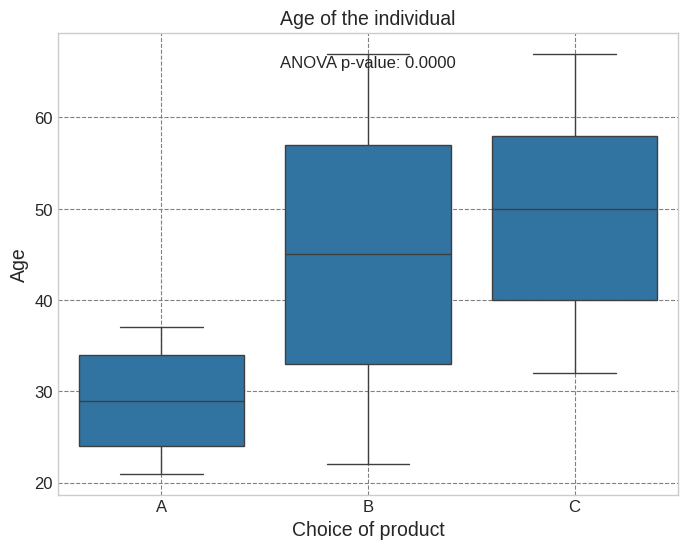


Tukey's HSD for household by product:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     A      B  -2.1835  -0.0 -2.463 -1.904   True
     A      C   0.8791  -0.0 0.6056 1.1525   True
     B      C   3.0626  -0.0 2.7838 3.3414   True
-------------------------------------------------


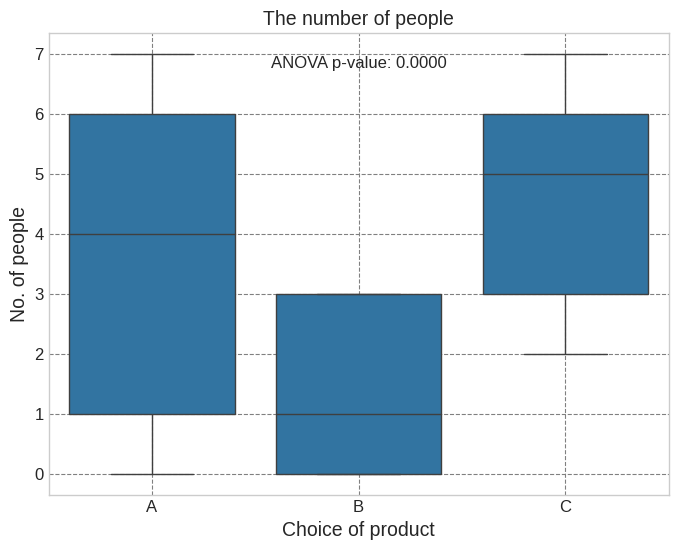

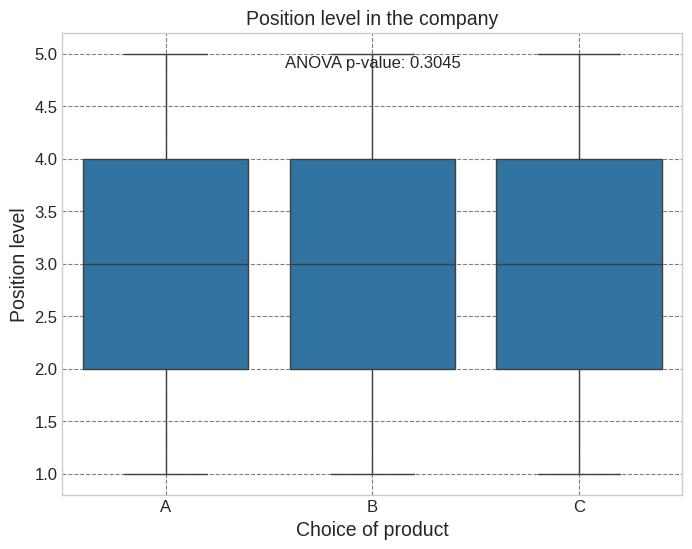

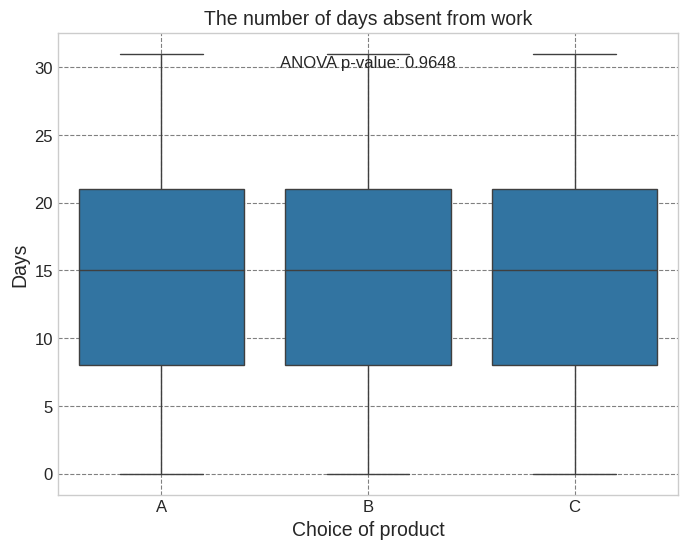

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Function to create boxplot with ANOVA and Tukey's HSD
def create_boxplot(data, x, y, xlab, ylab, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title, fontsize=14, ha='center')
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', color='gray')

    # Perform ANOVA
    groups = [data[data[x] == level][y] for level in data[x].cat.categories]
    anova_result = stats.f_oneway(*groups)
    plt.text(0.5, 0.95, f'ANOVA p-value: {anova_result.pvalue:.4f}', 
             ha='center', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Perform Tukey's HSD for significant pairwise comparisons
    if anova_result.pvalue < 0.05:
        tukey = pairwise_tukeyhsd(data[y], data[x])
        print(f"\nTukey's HSD for {y} by {x}:\n", tukey)

    plt.show()

# Create boxplots
create_boxplot(mf, 'product', 'age', 'Choice of product', 'Age', 'Age of the individual')
create_boxplot(mf, 'product', 'household', 'Choice of product', 'No. of people', 'The number of people')
create_boxplot(mf, 'product', 'position_level', 'Choice of product', 'Position level', 'Position level in the company')
create_boxplot(mf, 'product', 'absent', 'Choice of product', 'Days', 'The number of days absent from work')

#### Split Data

In [18]:
# Set seed for reproducibility
np.random.seed(11076)
tr_prop = 0.70

# Stratified train-test split based on 'product' and 'gender'
train = mf.groupby(['product', 'gender']).apply(lambda x: x.sample(frac=tr_prop, random_state=101)).reset_index(drop=True)
test = mf.drop(train.index)

# Print proportions
print("Training set product proportions:\n", train['product'].value_counts(normalize=True))
print("Test set product proportions:\n", test['product'].value_counts(normalize=True))

Training set product proportions:
 product
C    0.344181
A    0.340237
B    0.315582
Name: proportion, dtype: float64
Test set product proportions:
 product
A    0.354839
C    0.327189
B    0.317972
Name: proportion, dtype: float64



###  Fit a Multinminal Model






In [19]:
# Set reference level for 'product'
mf['product'] = mf['product'].cat.set_categories(['A'] + [cat for cat in mf['product'].cat.categories if cat != 'A'])
train['product'] = train['product'].cat.set_categories(['A'] + [cat for cat in train['product'].cat.categories if cat != 'A'])
test['product'] = test['product'].cat.set_categories(['A'] + [cat for cat in test['product'].cat.categories if cat != 'A'])

# Prepare data for multinomial logistic regression
y, X = dmatrices('product ~ age + household + position_level + absent + gender', data=train, return_type='dataframe')

# Fit multinomial logistic regression using MNLogit
model = MNLogit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.513924
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1014
Model:                        MNLogit   Df Residuals:                     1002
Method:                           MLE   Df Model:                           10
Date:                Tue, 12 Aug 2025   Pseudo R-squ.:                  0.5319
Time:                        14:22:39   Log-Likelihood:                -521.12
converged:                       True   LL-Null:                       -1113.3
Covariance Type:            nonrobust   LLR p-value:                3.554e-248
  y=product[B]       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.8114      0.607     -7.923      0.000      -6.002      -3.621
gender[T.Male]   

In [ ]:
%%R
fit.multinom<-nnet::multinom(product~., data= train, Hessain = T)

# weights:  21 (12 variable)
initial  value 1109.598412 
iter  10 value 702.581012
iter  20 value 517.407633
final  value 517.303192 
converged


### Z-statistics of Coefficients

To determine whether specific input variables are significant we will need to calculate the p-values of the coefficients manually by calculating the z-statistics.

In [22]:
# Calculate z-statistics and p-values
z_stats = model.params / model.bse
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_stats)))


# Create p-values DataFrame without transposing
p_values_df = pd.DataFrame(p_values, index=model.params.index, columns=model.params.columns)
print("\nP-values:\n", p_values_df)


P-values:
                            0         1
Intercept       2.220446e-15  0.000000
gender[T.Male]  0.000000e+00  0.983574
age             0.000000e+00  0.000000
household       0.000000e+00  0.000052
position_level  2.052090e-05  0.035490
absent          2.823080e-02  0.850537


### Relative Risk Ratios (RRRs)


In [23]:
RRRs = np.exp(model.params)
print("\nRelative Risk Ratios:\n", RRRs)


Relative Risk Ratios:
                        0         1
Intercept       0.008137  0.000041
gender[T.Male]  0.099471  0.995216
age             1.275508  1.304643
household       0.390297  1.277552
position_level  0.628263  0.806873
absent          1.034601  1.002871


### Model Performance

In [24]:
print("\nModel Performance:")
print(f"Log-Likelihood: {model.llf}")
print(f"AIC: {model.aic}")
print(f"BIC: {model.bic}")


Model Performance:
Log-Likelihood: -521.1190188624944
AIC: 1066.2380377249888
BIC: 1125.2979359348024


#### Overall Training Accuracy

In [27]:
# Get the full category names
categories = list(mf['product'].cat.categories)  # e.g., ['A', 'B', 'C']

# Debug: Print categories and prediction indices
print("\nProduct categories:", categories)
print("Prediction column names:", model.predict(X).columns)
print("Unique prediction indices:", model.predict(X).idxmax(axis=1).unique())

# Predict classes for training set
train['Pred.Class'] = model.predict(X).idxmax(axis=1)  # Returns integer indices (0, 1, 2, ...)
# Map integer indices to category names
train['Pred.Class'] = train['Pred.Class'].map(lambda x: categories[x])

# Calculate training accuracy
train_accuracy = accuracy_score(train['product'], train['Pred.Class'])
print(f"\nTraining Accuracy: {train_accuracy}")


Product categories: ['A', 'B', 'C']
Prediction column names: RangeIndex(start=0, stop=3, step=1)
Unique prediction indices: [0 2 1]

Training Accuracy: 0.7712031558185405


#### Confusion Matrix


Confusion Matrix (Training):
      A    B    C
A  282   39   24
B   50  241   29
C   47   43  259


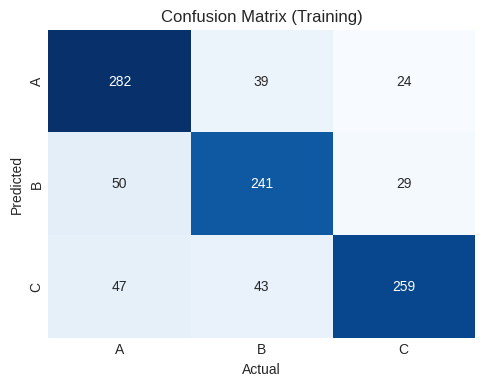

In [28]:
conf_matrix_train = confusion_matrix(train['product'], train['Pred.Class'], labels=mf['product'].cat.categories)
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, index=mf['product'].cat.categories, columns=mf['product'].cat.categories)
print("\nConfusion Matrix (Training):\n", conf_matrix_train_df)
plt.figure(figsize=(5.5, 4))
sns.heatmap(conf_matrix_train_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### In-class Accuracy or Per-class Accuracy

In [29]:
# Calculate in-class accuracy
in_class_accuracy_train = np.diag(conf_matrix_train) / conf_matrix_train.sum(axis=0)
# Handle potential division by zero (if a class has no predictions)
in_class_accuracy_train = np.nan_to_num(in_class_accuracy_train, nan=0.0)
in_class_accuracy_train_df = pd.DataFrame({
    'Class': mf['product'].cat.categories,
    'In-Class Accuracy (%)': np.round(in_class_accuracy_train * 100, 2)
})
print("\nIn-Class Accuracy for each class:\n", in_class_accuracy_train_df)


In-Class Accuracy for each class:
   Class  In-Class Accuracy (%)
0     A                  74.41
1     B                  74.61
2     C                  83.01


### Marginal Effects and Adjusted Predictions

The presentation of regression models, usually shown in tables, is a clear and easy way to interpret results. However, for more complex models that include interaction or transformed terms, such as quadratic or spline terms, using raw regression coefficients may be less effective. This can make it challenging to understand outcomes. In these cases, adjusted predictions or marginal means are a better solution. Using visual aids can also help to understand these effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.



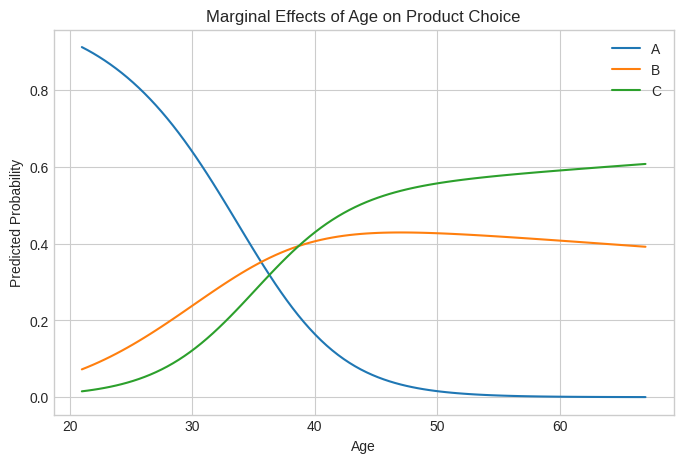

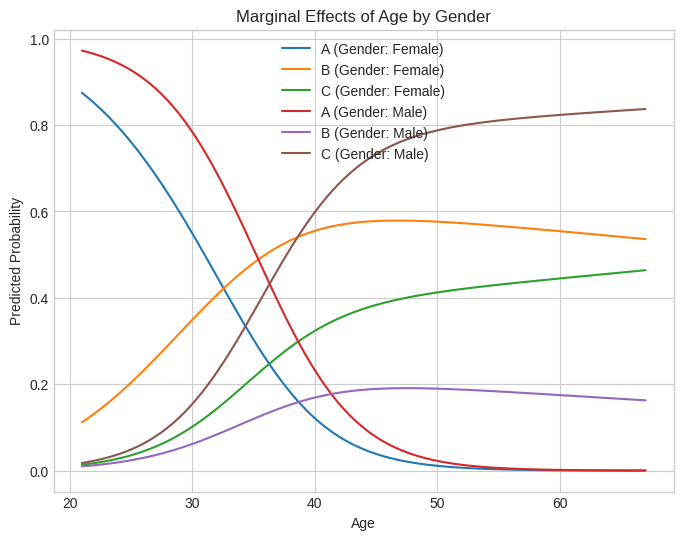

In [30]:
def calculate_marginal_effects(model, data, variable):
    data_copy = data.copy()
    var_values = np.linspace(data[variable].min(), data[variable].max(), 100)
    predictions = []
    for val in var_values:
        data_copy[variable] = val
        y, X_temp = dmatrices('product ~ age + household + position_level + absent + gender', data=data_copy, return_type='dataframe')
        pred = model.predict(X_temp)
        predictions.append(pred.mean(axis=0))
    predictions = np.array(predictions)
    return var_values, predictions

var_values, predictions = calculate_marginal_effects(model, train, 'age')
plt.figure(figsize=(8, 5))
for i, category in enumerate(categories):  # Use full categories list
    plt.plot(var_values, predictions[:, i], label=category)
plt.title('Marginal Effects of Age on Product Choice')
plt.xlabel('Age')
plt.ylabel('Predicted Probability')
plt.legend()
plt.grid(True)
plt.show()

def plot_age_gender_interaction(model, data):
    genders = data['gender'].cat.categories
    plt.figure(figsize=(8, 6))
    for gender in genders:
        data_subset = data[data['gender'] == gender].copy()
        var_values, predictions = calculate_marginal_effects(model, data_subset, 'age')
        for i, category in enumerate(categories):  # Use full categories list
            plt.plot(var_values, predictions[:, i], label=f'{category} (Gender: {gender})')
    plt.title('Marginal Effects of Age by Gender')
    plt.xlabel('Age')
    plt.ylabel('Predicted Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_age_gender_interaction(model, train)

### Cross-validation

In [31]:
np.random.seed(123)
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=123)
accuracy = []
categories = list(mf['product'].cat.categories)  # Define full categories for mapping

for train_index, test_index in kf.split(mf):
    train_data = mf.iloc[train_index]
    test_data = mf.iloc[test_index]
    y_train, X_train = dmatrices('product ~ age + household + position_level + absent + gender', data=train_data, return_type='dataframe')
    y_test, X_test = dmatrices('product ~ age + household + position_level + absent + gender', data=test_data, return_type='dataframe')
    cv_model = MNLogit(y_train, X_train).fit(disp=0)
    predictions = cv_model.predict(X_test).idxmax(axis=1)
    predictions = predictions.map(lambda x: categories[x])  # Map indices to full categories
    accuracy.append(accuracy_score(test_data['product'], predictions))
print(f"\nAverage Accuracy from Cross-Validation: {np.mean(accuracy)}")


Average Accuracy from Cross-Validation: 0.7665852490421455


### Prediction at Test Data


In [32]:
y_test, X_test = dmatrices('product ~ age + household + position_level + absent + gender', data=test, return_type='dataframe')
test['Pred.Class'] = model.predict(X_test).idxmax(axis=1)
test['Pred.Class'] = test['Pred.Class'].map(lambda x: categories[x])  # Map indices to full categories


#### Overall Auccuracy

In [33]:
test_accuracy = accuracy_score(test['product'], test['Pred.Class'])
print(f"\nTest Accuracy: {test_accuracy}")


Test Accuracy: 0.7488479262672811


#### Confusion Matrix


Confusion Matrix (Test):
      A   B    C
A  125  22    7
B   26  94   18
C   19  17  106


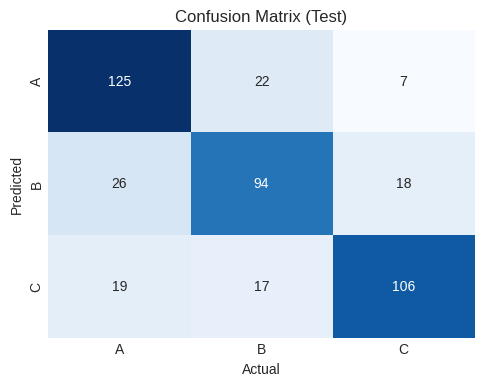

In [34]:
conf_matrix_test = confusion_matrix(test['product'], test['Pred.Class'], labels=mf['product'].cat.categories)
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, index=mf['product'].cat.categories, columns=mf['product'].cat.categories)
print("\nConfusion Matrix (Test):\n", conf_matrix_test_df)
plt.figure(figsize=(5.5, 4))
sns.heatmap(conf_matrix_test_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### In-class Accuracy or Per-class Accuracy





In [35]:
in_class_accuracy_test = np.diag(conf_matrix_test) / conf_matrix_test.sum(axis=0)
in_class_accuracy_test = np.nan_to_num(in_class_accuracy_test, nan=0.0)
in_class_accuracy_test_df = pd.DataFrame({
    'Class': mf['product'].cat.categories,
    'In-Class Accuracy (%)': np.round(in_class_accuracy_test * 100, 2)
})
print("\nIn-Class Accuracy for each class (Test):\n", in_class_accuracy_test_df)


In-Class Accuracy for each class (Test):
   Class  In-Class Accuracy (%)
0     A                  73.53
1     B                  70.68
2     C                  80.92


In [36]:
metrics = {
    'accuracy': accuracy_score(test['product'], test['Pred.Class']),
    'precision': precision_score(test['product'], test['Pred.Class'], average='weighted'),
    'recall': recall_score(test['product'], test['Pred.Class'], average='weighted'),
    'fscore': f1_score(test['product'], test['Pred.Class'], average='weighted')
}
print("\nPrediction Performance Summary:\n", pd.Series(metrics))


Prediction Performance Summary:
 accuracy     0.748848
precision    0.750391
recall       0.748848
fscore       0.748462
dtype: float64


## Summary and Conclusion

This notebook demonstrated the implementation of a multinomial logistic regression model using Python's statsmodels library. We explored the process of preparing the data, fitting the model, and evaluating its performance through various metrics such as accuracy, precision, recall, and F1-score. The use of confusion matrices and in-class accuracy calculations provided further insights into the model's performance across different classes. Overall, this analysis highlights the effectiveness of multinomial logistic regression for multi-class classification tasks.

## References

1. [Ordinal logistic regression](https://www.bookdown.org/rwnahhas/RMPH/blr-ordinal.html)

2. [ORDINAL LOGISTIC REGRESSION | R DATA ANALYSIS EXAMPLES](https://stats.oarc.ucla.edu/r/dae/ordinal-logistic-regression/)

3. [How to Perform Ordinal Logistic Regression in R](https://www.r-bloggers.com/2019/06/how-to-perform-ordinal-logistic-regression-in-r/)

4. [Chapter 12 Ordinal Logistic Regression](https://bookdown.org/chua/ber642_advanced_regression/ordinal-logistic-regression.html)

5. [Handbook of Regression Modeling in People Analytics:](https://peopleanalytics-regression-book.org/)

6. [scikit-learn LogisticRegression**: Multinomial logistic regression with `multi_class='multinomial'](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

7. [statsmodels MNLogit**: Multinomial logistic regression with statistical summaries](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.MNLogit.html)

8. [Towards Data Science**: Tutorial on multinomial logistic regression in Python](https://towardsdatascience.com/multinomial-logistic-regression-in-python-9ef196b0e047)

